# Plain KNN Baseline
## Load Images

In [1]:
# Load images
import numpy as np
from PIL import Image
import os

# Training
image_folder = "images/training_imgs"

# Log all sets of images so they are in the same order
full_body_images = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith("fb.png")]
clothing_images = [file[:-6] + "c.png" for file in full_body_images]
full_body_raw = [file[:-6] + "fb-unedited.png" for file in full_body_images]

# Break into categories
clothing_labels = [file.split("/")[-1].split("-")[0].split("_") for file in clothing_images]
clothing_images = [Image.open(file) for file in clothing_images]
clothing_labels = [[lab[0], lab[1], lab[2][:-1]] if lab[2].endswith("s") else lab for lab in clothing_labels]

## Run KNN

In [2]:
# Run regular CNN
from sklearn.model_selection import train_test_split

y_map = {"shirt": 0, "top": 0, "sweater": 1, "pant": 2, "skirt": 3, "short": 4}
y = np.array([y_map[label[2]] for label in clothing_labels])
clothing_images = np.array([np.array(clothing) for clothing in clothing_images])
clothing_images = np.reshape(clothing_images, (clothing_images.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(clothing_images, y, test_size=0.25)

In [3]:
# Run KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

matrix = confusion_matrix(y_test, knn.predict(X_test))
acc_per_class = matrix.diagonal()/matrix.sum(axis=1)

print(acc_per_class)

[0.8317757  0.51612903 0.95348837 0.32       0.71428571]


## Plot All Results

In [4]:
results = np.array([
    acc_per_class, # KNN Results
    [0.95, 0.77333333, 1., 0.66666667, 0.81818182], # VGG19 Results
    [0.9537037, 0.8115942, 0.98684211, 0.65, 0.9047619], # InceptionResNetV2 Results
    [0.91666667, 0.8245614, 1., 0.72222222, 0.95652174] # I-JEPA Results
])

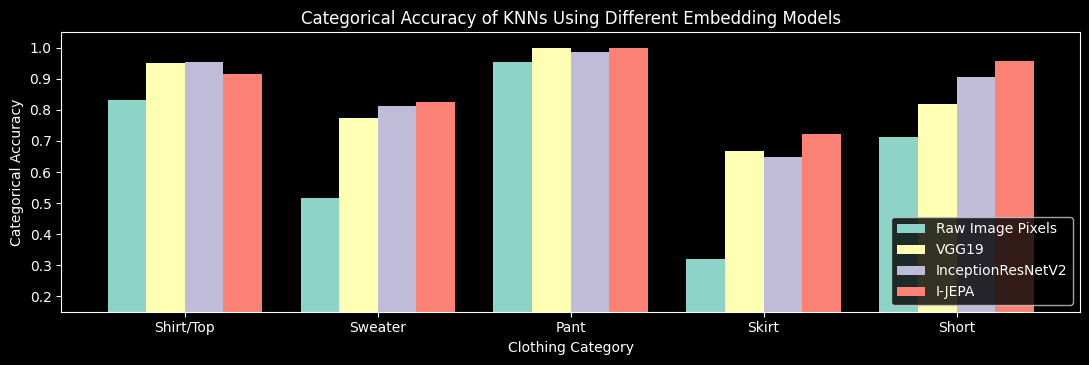

In [8]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")
plt.figure(figsize=[11, 3.75])
x = np.arange(5) * 1.25 + 0.25

for i in range(4):
    plt.bar(x + (i * 0.25), results[i, :], 0.25, label=["Raw Image Pixels", "VGG19", "InceptionResNetV2", "I-JEPA"][i])

plt.xticks(x + 0.25 + 0.125, ["Shirt/Top", "Sweater", "Pant", "Skirt", "Short"])
plt.xlabel("Clothing Category")
plt.ylabel("Categorical Accuracy")

plt.title("Categorical Accuracy of KNNs Using Different Embedding Models")
plt.ylim(0.15, 1.05)

plt.tight_layout()
plt.legend(loc="lower right")
plt.show()